In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [11]:
##### Problem
in_dim = 12
degree = 2
out_dim = 1
Batch_size = 512


In [ ]:
import torch
import torch.nn as nn
class MLayerNN(nn.Module):
    def __init__(self, in_dim, out_dim, depth, N_params):
        super(MLayerNN, self).__init__()
        
        # Initialize layer sizes list
        layer_dims = [in_dim]  # First layer is input dim
        h = int(N_params / ((in_dim + out_dim) * (depth)))
        while (in_dim * h + (depth-3) * h**2 + h * out_dim) > N_params:
            h -= 1
        layer_dims += [int(h)] * (depth - 2)  # Set all hidden layers to hidden_dim
        layer_dims.append(out_dim)  # Last layer is output dim
        
        self.layers = nn.ModuleList([
            nn.Linear(layer_dims[i-1], layer_dims[i]) for i in range(1,depth)
        ])
        self.params = sum(p.numel() for p in self.parameters() if p.ndimension() > 1)
        self.activation = nn.ReLU()
        print("dim",layer_dims, self.params)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))  # Apply ReLU activation
        return self.layers[-1](x)  # Final layer without activation


In [ ]:
import itertools
class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0), (0, 0, 0, 0

512
dim [12, 9, 9, 1] 198
Epoch [1/1000], Loss: 11.534579, lr: 0.001000
Epoch [2/1000], Loss: 12.027946, lr: 0.001000
Epoch [3/1000], Loss: 11.621530, lr: 0.001000
Epoch [4/1000], Loss: 11.384942, lr: 0.001000
Epoch [5/1000], Loss: 11.603915, lr: 0.001000
Epoch [6/1000], Loss: 11.274378, lr: 0.001000
Epoch [7/1000], Loss: 11.477848, lr: 0.001000
Epoch [8/1000], Loss: 10.965627, lr: 0.001000
Epoch [9/1000], Loss: 11.379682, lr: 0.001000
Epoch [10/1000], Loss: 11.189655, lr: 0.001000
Epoch [11/1000], Loss: 11.235706, lr: 0.001000
Epoch [12/1000], Loss: 10.529450, lr: 0.001000
Epoch [13/1000], Loss: 10.369725, lr: 0.001000
Epoch [14/1000], Loss: 10.238498, lr: 0.001000
Epoch [15/1000], Loss: 10.342400, lr: 0.001000
Epoch [16/1000], Loss: 10.638839, lr: 0.001000
Epoch [17/1000], Loss: 10.112857, lr: 0.001000
Epoch [18/1000], Loss: 9.630367, lr: 0.001000
Epoch [19/1000], Loss: 9.390903, lr: 0.001000
Epoch [20/1000], Loss: 9.582824, lr: 0.001000
Epoch [21/1000], Loss: 9.576491, lr: 0.001000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


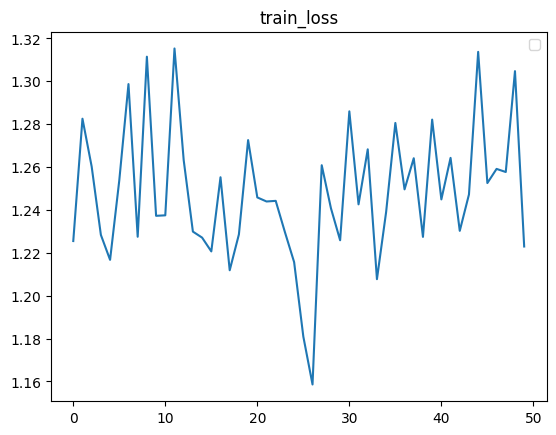

Training Complete!
1024
dim [12, 19, 19, 1] 608
Epoch [1/1000], Loss: 11.466184, lr: 0.001000
Epoch [2/1000], Loss: 12.044319, lr: 0.001000
Epoch [3/1000], Loss: 11.447664, lr: 0.001000
Epoch [4/1000], Loss: 11.601787, lr: 0.001000
Epoch [5/1000], Loss: 11.084780, lr: 0.001000
Epoch [6/1000], Loss: 11.587037, lr: 0.001000
Epoch [7/1000], Loss: 11.178758, lr: 0.001000
Epoch [8/1000], Loss: 11.490371, lr: 0.001000
Epoch [9/1000], Loss: 10.811048, lr: 0.001000
Epoch [10/1000], Loss: 10.763960, lr: 0.001000
Epoch [11/1000], Loss: 10.369979, lr: 0.001000
Epoch [12/1000], Loss: 10.162538, lr: 0.001000
Epoch [13/1000], Loss: 9.823809, lr: 0.001000
Epoch [14/1000], Loss: 9.200277, lr: 0.001000
Epoch [15/1000], Loss: 8.439662, lr: 0.001000
Epoch [16/1000], Loss: 9.027037, lr: 0.001000
Epoch [17/1000], Loss: 8.301431, lr: 0.001000
Epoch [18/1000], Loss: 8.579087, lr: 0.001000
Epoch [19/1000], Loss: 7.821526, lr: 0.001000
Epoch [20/1000], Loss: 7.729289, lr: 0.001000
Epoch [21/1000], Loss: 7.6445

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


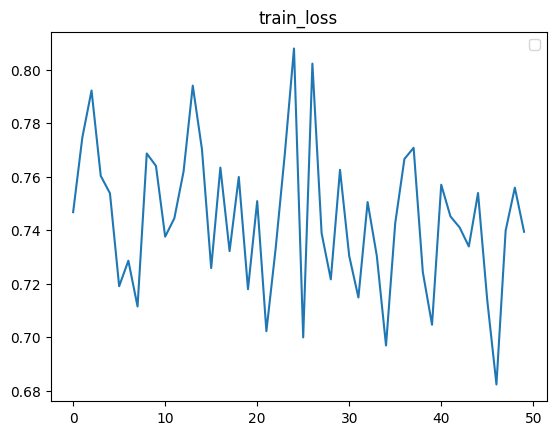

Training Complete!
2048
dim [12, 39, 39, 1] 2028
Epoch [1/1000], Loss: 11.564398, lr: 0.001000
Epoch [2/1000], Loss: 11.117697, lr: 0.001000
Epoch [3/1000], Loss: 11.016622, lr: 0.001000
Epoch [4/1000], Loss: 11.841650, lr: 0.001000
Epoch [5/1000], Loss: 10.959897, lr: 0.001000
Epoch [6/1000], Loss: 10.565169, lr: 0.001000
Epoch [7/1000], Loss: 10.350863, lr: 0.001000
Epoch [8/1000], Loss: 9.603735, lr: 0.001000
Epoch [9/1000], Loss: 9.206087, lr: 0.001000
Epoch [10/1000], Loss: 8.743894, lr: 0.001000
Epoch [11/1000], Loss: 8.488403, lr: 0.001000
Epoch [12/1000], Loss: 7.916275, lr: 0.001000
Epoch [13/1000], Loss: 7.401263, lr: 0.001000
Epoch [14/1000], Loss: 7.541411, lr: 0.001000
Epoch [15/1000], Loss: 6.696863, lr: 0.001000
Epoch [16/1000], Loss: 6.008515, lr: 0.001000
Epoch [17/1000], Loss: 5.747038, lr: 0.001000
Epoch [18/1000], Loss: 5.246361, lr: 0.001000
Epoch [19/1000], Loss: 4.450316, lr: 0.001000
Epoch [20/1000], Loss: 4.175303, lr: 0.001000
Epoch [21/1000], Loss: 3.455033, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.180165, lr: 0.001000


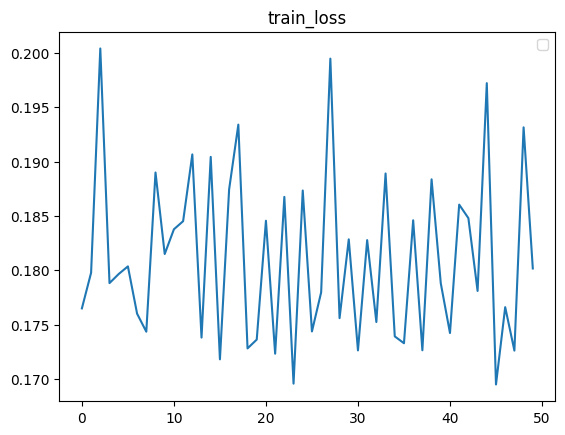

Training Complete!
4096
dim [12, 57, 57, 1] 3990
Epoch [1/1000], Loss: 11.473769, lr: 0.001000
Epoch [2/1000], Loss: 11.411259, lr: 0.001000
Epoch [3/1000], Loss: 11.130249, lr: 0.001000
Epoch [4/1000], Loss: 10.908078, lr: 0.001000
Epoch [5/1000], Loss: 10.883412, lr: 0.001000
Epoch [6/1000], Loss: 9.894980, lr: 0.001000
Epoch [7/1000], Loss: 9.598372, lr: 0.001000
Epoch [8/1000], Loss: 8.315783, lr: 0.001000
Epoch [9/1000], Loss: 8.131480, lr: 0.001000
Epoch [10/1000], Loss: 7.861799, lr: 0.001000
Epoch [11/1000], Loss: 7.023532, lr: 0.001000
Epoch [12/1000], Loss: 6.813560, lr: 0.001000
Epoch [13/1000], Loss: 5.771441, lr: 0.001000
Epoch [14/1000], Loss: 5.196201, lr: 0.001000
Epoch [15/1000], Loss: 4.942427, lr: 0.001000
Epoch [16/1000], Loss: 3.997318, lr: 0.001000
Epoch [17/1000], Loss: 3.653776, lr: 0.001000
Epoch [18/1000], Loss: 3.031516, lr: 0.001000
Epoch [19/1000], Loss: 2.279288, lr: 0.001000
Epoch [20/1000], Loss: 1.847982, lr: 0.001000
Epoch [21/1000], Loss: 1.526302, lr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.089516, lr: 0.001000


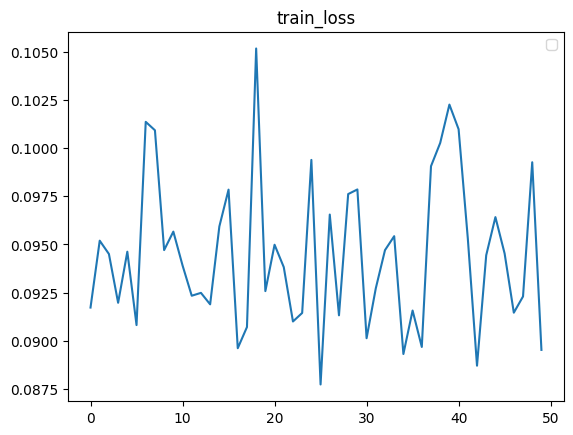

Training Complete!
8192
dim [12, 84, 84, 1] 8148
Epoch [1/1000], Loss: 11.693948, lr: 0.001000
Epoch [2/1000], Loss: 11.161991, lr: 0.001000
Epoch [3/1000], Loss: 11.000149, lr: 0.001000
Epoch [4/1000], Loss: 10.633446, lr: 0.001000
Epoch [5/1000], Loss: 9.510511, lr: 0.001000
Epoch [6/1000], Loss: 9.203088, lr: 0.001000
Epoch [7/1000], Loss: 8.485728, lr: 0.001000
Epoch [8/1000], Loss: 7.704302, lr: 0.001000
Epoch [9/1000], Loss: 7.267815, lr: 0.001000
Epoch [10/1000], Loss: 6.409327, lr: 0.001000
Epoch [11/1000], Loss: 6.129689, lr: 0.001000
Epoch [12/1000], Loss: 5.032385, lr: 0.001000
Epoch [13/1000], Loss: 4.231880, lr: 0.001000
Epoch [14/1000], Loss: 3.456867, lr: 0.001000
Epoch [15/1000], Loss: 2.851306, lr: 0.001000
Epoch [16/1000], Loss: 1.931747, lr: 0.001000
Epoch [17/1000], Loss: 1.631701, lr: 0.001000
Epoch [18/1000], Loss: 1.230204, lr: 0.001000
Epoch [19/1000], Loss: 1.022923, lr: 0.001000
Epoch [20/1000], Loss: 0.849657, lr: 0.001000
Epoch [21/1000], Loss: 0.729074, lr:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.042964, lr: 0.001000


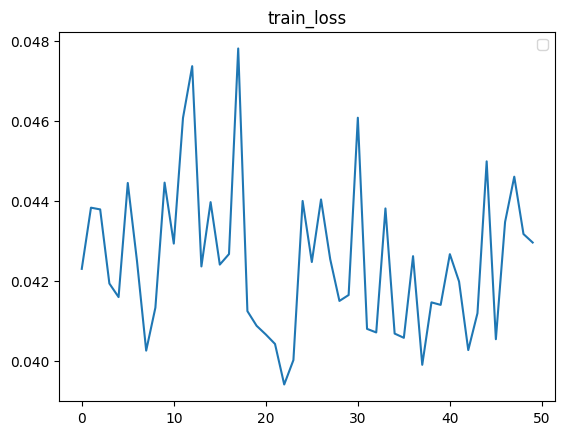

Training Complete!
16384
dim [12, 121, 121, 1] 16214
Epoch [1/1000], Loss: 11.813473, lr: 0.001000
Epoch [2/1000], Loss: 11.264411, lr: 0.001000
Epoch [3/1000], Loss: 10.753674, lr: 0.001000
Epoch [4/1000], Loss: 9.686305, lr: 0.001000
Epoch [5/1000], Loss: 8.680190, lr: 0.001000
Epoch [6/1000], Loss: 8.149943, lr: 0.001000
Epoch [7/1000], Loss: 7.053597, lr: 0.001000
Epoch [8/1000], Loss: 6.648179, lr: 0.001000
Epoch [9/1000], Loss: 5.526546, lr: 0.001000
Epoch [10/1000], Loss: 4.751801, lr: 0.001000
Epoch [11/1000], Loss: 4.041210, lr: 0.001000
Epoch [12/1000], Loss: 2.958853, lr: 0.001000
Epoch [13/1000], Loss: 2.042144, lr: 0.001000
Epoch [14/1000], Loss: 1.316070, lr: 0.001000
Epoch [15/1000], Loss: 0.983748, lr: 0.001000
Epoch [16/1000], Loss: 0.754735, lr: 0.001000
Epoch [17/1000], Loss: 0.622211, lr: 0.001000
Epoch [18/1000], Loss: 0.597936, lr: 0.001000
Epoch [19/1000], Loss: 0.505287, lr: 0.001000
Epoch [20/1000], Loss: 0.486788, lr: 0.001000
Epoch [21/1000], Loss: 0.468428, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.022584, lr: 0.001000


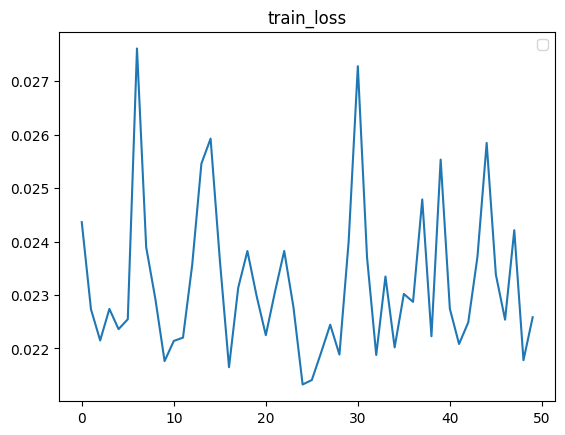

Training Complete!
32768
dim [12, 174, 174, 1] 32538
Epoch [1/1000], Loss: 11.611572, lr: 0.001000
Epoch [2/1000], Loss: 10.463053, lr: 0.001000
Epoch [3/1000], Loss: 9.224211, lr: 0.001000
Epoch [4/1000], Loss: 8.577861, lr: 0.001000
Epoch [5/1000], Loss: 7.634519, lr: 0.001000
Epoch [6/1000], Loss: 6.549342, lr: 0.001000
Epoch [7/1000], Loss: 6.127764, lr: 0.001000
Epoch [8/1000], Loss: 4.858460, lr: 0.001000
Epoch [9/1000], Loss: 3.301997, lr: 0.001000
Epoch [10/1000], Loss: 2.360010, lr: 0.001000
Epoch [11/1000], Loss: 1.422386, lr: 0.001000
Epoch [12/1000], Loss: 0.912411, lr: 0.001000
Epoch [13/1000], Loss: 0.641573, lr: 0.001000
Epoch [14/1000], Loss: 0.520870, lr: 0.001000
Epoch [15/1000], Loss: 0.502126, lr: 0.001000
Epoch [16/1000], Loss: 0.469815, lr: 0.001000
Epoch [17/1000], Loss: 0.462298, lr: 0.001000
Epoch [18/1000], Loss: 0.474158, lr: 0.001000
Epoch [19/1000], Loss: 0.429440, lr: 0.001000
Epoch [20/1000], Loss: 0.447353, lr: 0.001000
Epoch [21/1000], Loss: 0.460258, l

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.013767, lr: 0.001000


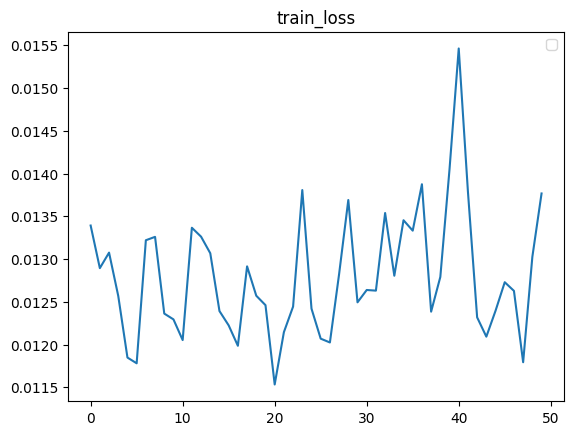

Training Complete!
65536
dim [12, 249, 249, 1] 65238
Epoch [1/1000], Loss: 11.247567, lr: 0.001000
Epoch [2/1000], Loss: 9.974220, lr: 0.001000
Epoch [3/1000], Loss: 8.446187, lr: 0.001000
Epoch [4/1000], Loss: 7.391011, lr: 0.001000
Epoch [5/1000], Loss: 6.213495, lr: 0.001000
Epoch [6/1000], Loss: 4.715558, lr: 0.001000
Epoch [7/1000], Loss: 3.341406, lr: 0.001000
Epoch [8/1000], Loss: 1.592800, lr: 0.001000
Epoch [9/1000], Loss: 0.881691, lr: 0.001000
Epoch [10/1000], Loss: 0.604729, lr: 0.001000
Epoch [11/1000], Loss: 0.486340, lr: 0.001000
Epoch [12/1000], Loss: 0.438732, lr: 0.001000
Epoch [13/1000], Loss: 0.432480, lr: 0.001000
Epoch [14/1000], Loss: 0.394223, lr: 0.001000
Epoch [15/1000], Loss: 0.416102, lr: 0.001000
Epoch [16/1000], Loss: 0.427584, lr: 0.001000
Epoch [17/1000], Loss: 0.411842, lr: 0.001000
Epoch [18/1000], Loss: 0.423663, lr: 0.001000
Epoch [19/1000], Loss: 0.417319, lr: 0.001000
Epoch [20/1000], Loss: 0.415444, lr: 0.001000
Epoch [21/1000], Loss: 0.393498, lr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.008231, lr: 0.001000


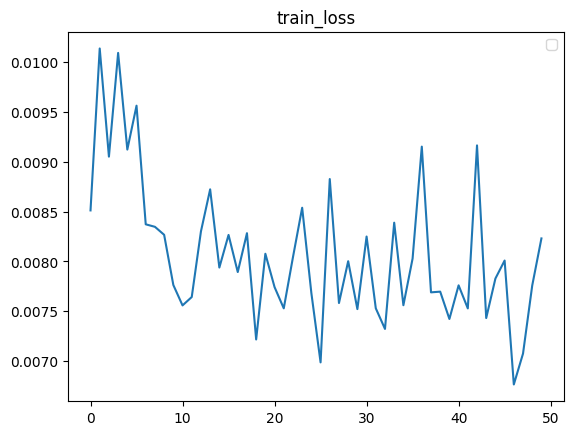

Training Complete!
131072
dim [12, 355, 355, 1] 130640
Epoch [1/1000], Loss: 10.805875, lr: 0.001000
Epoch [2/1000], Loss: 9.279638, lr: 0.001000
Epoch [3/1000], Loss: 8.306051, lr: 0.001000
Epoch [4/1000], Loss: 6.596424, lr: 0.001000
Epoch [5/1000], Loss: 5.275149, lr: 0.001000
Epoch [6/1000], Loss: 3.079698, lr: 0.001000
Epoch [7/1000], Loss: 1.534524, lr: 0.001000
Epoch [8/1000], Loss: 0.732378, lr: 0.001000
Epoch [9/1000], Loss: 0.543022, lr: 0.001000
Epoch [10/1000], Loss: 0.453418, lr: 0.001000
Epoch [11/1000], Loss: 0.414782, lr: 0.001000
Epoch [12/1000], Loss: 0.397866, lr: 0.001000
Epoch [13/1000], Loss: 0.423300, lr: 0.001000
Epoch [14/1000], Loss: 0.427259, lr: 0.001000
Epoch [15/1000], Loss: 0.388625, lr: 0.001000
Epoch [16/1000], Loss: 0.378284, lr: 0.001000
Epoch [17/1000], Loss: 0.362959, lr: 0.001000
Epoch [18/1000], Loss: 0.411720, lr: 0.001000
Epoch [19/1000], Loss: 0.374130, lr: 0.001000
Epoch [20/1000], Loss: 0.373495, lr: 0.001000
Epoch [21/1000], Loss: 0.370043, 

In [ ]:
#ToDO
import time
models = []
parameters = []
train_losses = []
max_depth = 1 
max_params = 1
for j in range(1,1):
    depth = 3 + (3 - 1) * j - 2 + 1
    mods = []
    pars = []
    for i in range(max_params):
        params = 2**i * 64
        model = MLayerNN(in_dim, out_dim, depth = depth , N_params = params)
        if model.params == 0:
            continue
        pars.append(model.params)
        epochs = 1000
        train_loss = []
        model.train()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            running_loss = 0.0 
            for samples in range(10):
                start_time = time.time()
                optimizer.zero_grad()
                input = torch.randn(Batch_size, in_dim)
                target = poly(input)
                outputs = model(input)
                loss = criterion(target, outputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_loss = running_loss / 100
            train_loss.append(avg_loss)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
        train_losses.append(train_loss)
        mods.append(model)
        plt.plot(train_loss[-50:])
        plt.title(f'train_loss')
        plt.legend()
        plt.show()
        print("Training Complete!")
    models.append(mods)
    parameters.append(pars)


In [ ]:
import dill
with open("polys_NN.dill", "wb") as f:
    dill.dump(models, f)